In [1]:
from scipy.signal import butter # low-pass filter
from statsmodels.tsa.tsatools import detrend # detrend timeseries
from statsmodels.tsa.seasonal import seasonal_decompose # deseasonalize timeseries
from sklearn.preprocessing import StandardScaler

import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [61]:
data_fp = '../solodoch_data_minimal/26N.nc'

ecco_data = xr.open_dataset(data_fp)
ssh = ecco_data['SSH'].values.squeeze()

In [3]:
ssh_detrend = detrend(ssh, order = 1, axis = 0)

In [64]:
ssh_deseason = seasonal_decompose(ssh, model = 'additive', period = 12, extrapolate_trend = 6) # should detrend and deseason, use the residuals!

In [69]:
(np.abs((ssh_deseason.trend + ssh_deseason.seasonal + ssh_deseason.resid) - ssh) < 0.01).sum()

47232

In [25]:
scaler = StandardScaler()
ssh_new = scaler.fit_transform(ssh).reshape(ssh.shape[0], 1, ssh.shape[1])
ssh_new.shape

(288, 1, 164)

In [26]:
new_array = xr.full_like(ecco_data, 0)
dims = ('time', 'latitude', 'longitude')
new_array['SSH'] = (dims, ssh_new)

In [32]:
list(new_array.keys())

['SSH', 'ZWS', 'OBP', 'SSS', 'SST']

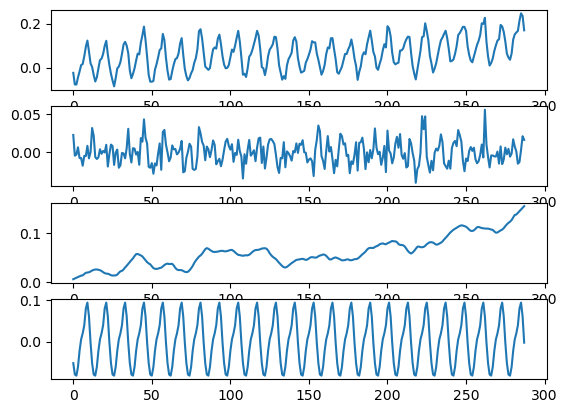

In [65]:
lon = 0

fig, axs = plt.subplots(4, 1)

axs[0].plot(ssh[ : , lon])
axs[1].plot(ssh_deseason.resid[ : , lon])
axs[2].plot(ssh_deseason.trend[ : , lon])
axs[3].plot(ssh_deseason.seasonal[ : , lon])

plt.show()

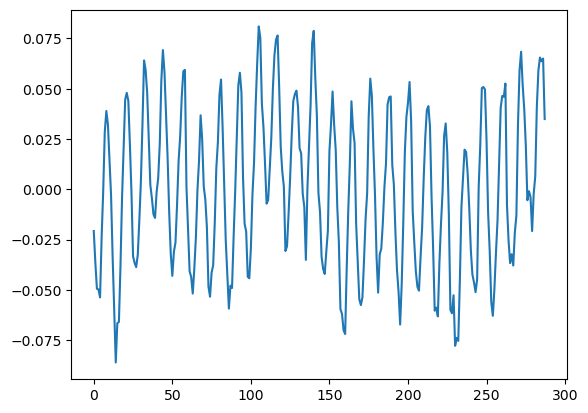

In [72]:
plt.plot(ssh_detrend[ : , lon])